In [20]:
import scipy.stats.mstats as stats
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn import neighbors
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('white')

Source = https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
# Below code can be used to get the address or the city from Long/Lat coordiantes in case needed
#pip install geopy
#from geopy.geocoders import Nominatim
#geolocator = Nominatim()
#location = geolocator.reverse("48.47.5112, -122.257")
#print(location.address)

In [5]:
# creating a subset of data without id etc. variables not used
df1=df.loc[:, 'price':'sqft_lot15']


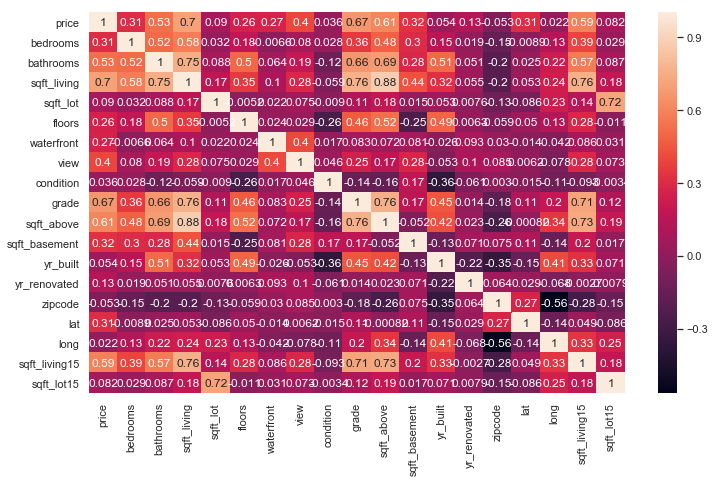

In [6]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data=df1.corr(), annot=True)
plt.show()

### OLS-Linear regression (Simple) i.e only one X variable

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


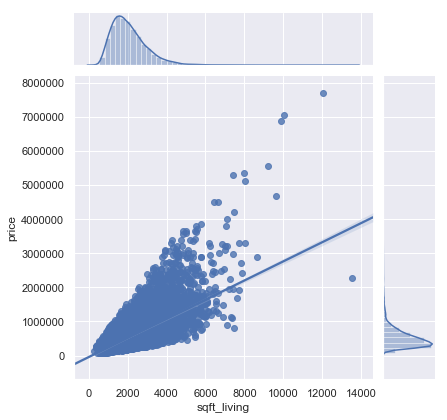

The score or accuracy [0.48319936 0.50185894 0.47088461 0.51367443 0.45344639 0.50121587
 0.5015115  0.48919046 0.49376918 0.48544901]
Weighted Accuracy: 0.49 (+/- 0.03)
The R2 of the model, using object attribute 0.49285321790379316


In [7]:
Y=(df1['price'])
X=df1[['sqft_living']]
regr= linear_model.LinearRegression().fit(X, Y)

sns.jointplot(X.columns[0], Y.name, data=df1, kind="reg");
plt.show()
score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

### KNN regression (Simple) i.e only one X variable

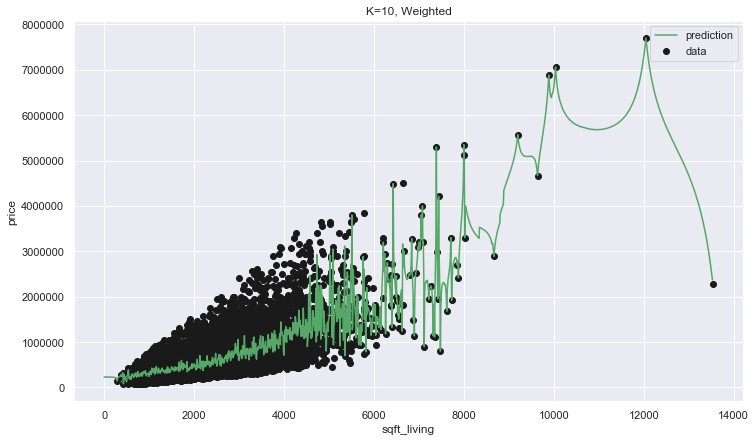

[0.45774327 0.52285702 0.45312916 0.55010579 0.46441561 0.39120287
 0.42759028 0.47363508 0.46817043 0.45653656]
Weighted Accuracy: 0.47 (+/- 0.08)
The R2 of the model, using knn method 0.5960056025641471


In [8]:
knn= neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
Y=df1['price']
X=df1[['sqft_living']]
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0,  X.max()[0], 10)[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.xlabel(X.columns[0])
plt.ylabel(Y.name)
plt.show()

# Perform your evaluation here.
#print ('\nK is ', K)
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X, y=Y, estimator=knn, cv=10)
print (score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using knn method',knn.score(X,Y))

### OLS-Linear regression (Multi-variate) i.e more than one X variable

In [9]:
Y=df1['price']
X=df1[['sqft_living', 'grade']]
regr= linear_model.LinearRegression().fit(X, Y)

score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

The score or accuracy [0.50268415 0.53853303 0.51242516 0.54091126 0.49656199 0.54722602
 0.54505265 0.54028766 0.53653766 0.55259044]
Weighted Accuracy: 0.53 (+/- 0.04)
The R2 of the model, using object attribute 0.534502380535107


### KNN regression (Multi) i.e more than one X variable

In [10]:
knn= neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
Y=df1['price']
X=df1[['sqft_living', 'grade']]
knn.fit(X, Y)

# Perform your evaluation here.
#print ('\nK is ', K)
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X, y=Y, estimator=knn, cv=10)
print (score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using knn method',knn.score(X,Y))

[0.5015134  0.50725422 0.47066021 0.56696185 0.48559869 0.38416088
 0.45719836 0.52546502 0.48552822 0.48559408]
Weighted Accuracy: 0.49 (+/- 0.09)
The R2 of the model, using knn method 0.7166292667898749


#### Using all the 19 features/Variables in the data to perform a Mulitple LSR

In [11]:
# converting dates into a meaning ful feature 
df1=df
conv_dates = [1 if values == 2014 else 0 for values in df1.date ]
df1['date'] = conv_dates

#initialing X and Y
Y=df1['price']
df1 = df1.drop(['id', 'price'],axis=1)

X=df1[df1.columns]
regr= linear_model.LinearRegression().fit(X, Y)

score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

The score or accuracy [0.69572253 0.69825289 0.68884931 0.69253184 0.68095807 0.70406343
 0.71124795 0.70874403 0.69991629 0.6715889 ]
Weighted Accuracy: 0.70 (+/- 0.02)
The R2 of the model, using object attribute 0.6997471890109153


#### Using all the 19 features/Variables in the data to perform a Mulitple KNN Regression

In [12]:
df1=df
conv_dates = [1 if values == 2014 else 0 for values in df1.date ]
df1['date'] = conv_dates

#initialing X and Y
Y=df1['price']
df1 = df1.drop(['id', 'price'],axis=1)
X=df1[df1.columns]

# Initiating the model
knn= neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X, Y)

# Perform your evaluation here.
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X, y=Y, estimator=knn, cv=10)
print (score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using knn method', knn.score(X, Y))

[0.49938781 0.54672647 0.5562724  0.48979908 0.45373994 0.55090426
 0.52588744 0.53590168 0.54475762 0.46938005]
Weighted Accuracy: 0.52 (+/- 0.07)
The R2 of the model, using knn method 0.9991338290544213


Irrespective of the number of variables/features used in the regression we see here that OLS regression outperforms the KNN regression with accuracy with an average of 70% accuracy vs. 50% accuracy.

I think KNN regression may be better than OLS regression (which is the simplest of all the models ) but not in this case or the dataset used. For the relationships and variance in this dataset the model suited better is OLS regression.


## Extra code

### Using Feature selections methods to see which features are worthwile to consider for regression..and see if the accuracy of the model is any better using the best three features from the 'SelectKBest' selection

In [13]:
df1.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Using SelectKBest selector

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df1=df
conv_dates = [1 if values == 2014 else 0 for values in df1.date ]
df1['date'] = conv_dates

Y=df1['price']
df1 = df1.drop(['id', 'price', 'long', 'date'],axis=1)
X=df1[df1.columns]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores and select the best 4 columns or features
np.set_printoptions(precision=3)
dic=dict()
for i, name in enumerate(X.columns):
    dic[name]=fit.scores_[i]
cols_selected=sorted(dic, key=dic.__getitem__, reverse=True)
print ('The most important columns are', cols_selected[0:4])

The most important columns are ['sqft_lot', 'sqft_lot15', 'yr_renovated', 'sqft_living']


In [15]:
#initialing X and Y
X=df1[cols_selected[0:4]]
regr= linear_model.LinearRegression().fit(X, Y)

score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

The score or accuracy [0.489 0.518 0.48  0.524 0.47  0.512 0.506 0.498 0.507 0.487]
Weighted Accuracy: 0.50 (+/- 0.03)
The R2 of the model, using object attribute 0.5027397147484374


### Using Recurssive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
df1=df
Y=df1['price']
df1 = df1.drop(['id', 'price', 'long', 'date'],axis=1)
X=df1[df1.columns]
regr= linear_model.LinearRegression().fit(X, Y)
rfe = RFE(regr, 4)
fit = rfe.fit(X, Y)

dic=dict()
for i, name in enumerate(X.columns):
    dic[name]=fit.ranking_[i]
cols_selected=sorted(dic, key=dic.__getitem__)
print ('The most important columns are', cols_selected[0:4])

The most important columns are ['waterfront', 'view', 'grade', 'lat']


In [17]:
#initialing X and Y
X=df1[cols_selected[0:4]]
regr= linear_model.LinearRegression().fit(X, Y)

score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

The score or accuracy [0.586 0.559 0.555 0.554 0.542 0.586 0.587 0.61  0.577 0.578]
Weighted Accuracy: 0.57 (+/- 0.04)
The R2 of the model, using object attribute 0.57590023875707


### PCA to reduce dimensions

In [24]:
df1=df
Y=df1['price']
df1 = df1.drop(['id', 'price', 'long', 'date'],axis=1)
X=df1[df1.columns]

regr= linear_model.LinearRegression().fit(X, Y)
score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

pca = PCA(n_components=3)
pca.fit(X)
X=pca.transform(X)

regr= linear_model.LinearRegression().fit(X, Y)
score=cross_val_score(regr,X=X,y=Y, cv=10)
print ('\nThe score or accuracy', score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print ('The R2 of the model, using object attribute', regr.score(X, Y))

The score or accuracy [0.694 0.694 0.688 0.69  0.677 0.7   0.708 0.704 0.696 0.659]
Weighted Accuracy: 0.69 (+/- 0.03)
The R2 of the model, using object attribute 0.6960307148442955

The score or accuracy [0.475 0.496 0.469 0.496 0.46  0.508 0.5   0.496 0.486 0.404]
Weighted Accuracy: 0.48 (+/- 0.06)
The R2 of the model, using object attribute 0.48259872114578184
